In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\vscode_code\data analysis projects\v_loan_analytics_master.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              682 non-null    int64  
 1   account_id           682 non-null    int64  
 2   loan_issued_date     682 non-null    object 
 3   loan_year            682 non-null    int64  
 4   loan_amount          682 non-null    int64  
 5   loan_duration        682 non-null    int64  
 6   monthly_payment      682 non-null    int64  
 7   loan_status_code     682 non-null    object 
 8   loan_category        682 non-null    object 
 9   gender               682 non-null    object 
 10  age                  682 non-null    int64  
 11  age_group            682 non-null    object 
 12  district_name        682 non-null    object 
 13  region               682 non-null    object 
 14  region_unemployment  682 non-null    float64
 15  district_avg_salary  682 non-null    int

In [4]:
pd.set_option("display.max.columns",30)

In [5]:
df.head()

,loan_id,account_id,loan_issued_date,loan_year,loan_amount,loan_duration,monthly_payment,loan_status_code,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,sanction_count,risk_flag_sanctions,card_usage_count,tech_adoption_flag
0,5005,176,1997-04-10,1997,27456,12,2288,A,Good Loan,Male,32,25-40,Novy Jicin,north Moravia,5.750,8678,29.694158,49256.09,800.0,6985.3,0,Normal Risk,0,Cash Only
1,6015,5001,1996-11-09,1996,110112,24,4588,A,Good Loan,Male,36,25-40,Blansko,south Moravia,3.045,8240,17.389330,54492.88,700.0,13880.5,0,Normal Risk,0,Cash Only
2,5319,1811,1994-06-23,1994,239460,60,3991,C,Good Loan,Female,57,Over 55,Teplice,north Bohemia,6.780,9317,53.938557,35110.61,300.0,14941.8,0,Normal Risk,0,Cash Only
3,5815,4116,1998-06-03,1998,151200,36,4200,C,Good Loan,Male,53,41-55,Kutna Hora,central Bohemia,3.485,8546,36.940600,52607.39,1000.0,18648.2,0,Normal Risk,0,Cash Only
4,5002,173,1994-05-31,1994,104808,12,8734,A,Good Loan,Male,60,Over 55,Zdar nad Sazavou,south Moravia,3.815,8512,17.284951,37433.85,500.0,17342.0,0,Normal Risk,0,Cash Only


In [6]:
df_c = df.copy()

In [7]:
# the traget varibale will be loan_category column.
# 1 stands for good loan 0 for bad
df_c["loan_category"] = np.where(df_c["loan_category"] == "Good Loan",1,0)

In [8]:
# Removing column loan_status_code to prevent overfitting
df_c = df_c.drop(["loan_status_code"], axis = 1)


In [9]:
df_c

,loan_id,account_id,loan_issued_date,loan_year,loan_amount,loan_duration,monthly_payment,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,sanction_count,risk_flag_sanctions,card_usage_count,tech_adoption_flag
0,5005,176,1997-04-10,1997,27456,12,2288,1,Male,32,25-40,Novy Jicin,north Moravia,5.750,8678,29.694158,49256.09,800.0,6985.3,0,Normal Risk,0,Cash Only
1,6015,5001,1996-11-09,1996,110112,24,4588,1,Male,36,25-40,Blansko,south Moravia,3.045,8240,17.389330,54492.88,700.0,13880.5,0,Normal Risk,0,Cash Only
2,5319,1811,1994-06-23,1994,239460,60,3991,1,Female,57,Over 55,Teplice,north Bohemia,6.780,9317,53.938557,35110.61,300.0,14941.8,0,Normal Risk,0,Cash Only
3,5815,4116,1998-06-03,1998,151200,36,4200,1,Male,53,41-55,Kutna Hora,central Bohemia,3.485,8546,36.940600,52607.39,1000.0,18648.2,0,Normal Risk,0,Cash Only
4,5002,173,1994-05-31,1994,104808,12,8734,1,Male,60,Over 55,Zdar nad Sazavou,south Moravia,3.815,8512,17.284951,37433.85,500.0,17342.0,0,Normal Risk,0,Cash Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6249,6138,1997-07-30,1997,67608,24,2817,1,Female,36,25-40,Brno - mesto,south Moravia,1.780,9897,48.271280,23762.46,200.0,13686.3,0,Normal Risk,0,Cash Only
678,6755,8713,1998-07-24,1998,170700,60,2845,1,Male,28,25-40,Blansko,south Moravia,3.045,8240,17.389330,32501.45,400.0,2845.0,0,Normal Risk,0,Cash Only
679,6215,5944,1998-06-18,1998,78720,48,1640,1,Female,55,41-55,Plzen - jih,west Bohemia,0.970,8561,16.018307,47499.13,1000.0,6325.0,0,Normal Risk,1,Card User
680,5693,3489,1995-08-01,1995,44088,24,1837,1,Female,48,41-55,Nymburk,central Bohemia,3.680,8899,33.647227,43216.35,1000.0,5210.0,0,Normal Risk,0,Cash Only


In [10]:
# Cash  Only will be 1 and Card User will be 0
df_c["tech_adoption_flag"] = np.where(df_c["tech_adoption_flag"] == "Cash Only", 1, 0)

In [11]:
df_c["risk_flag_sanctions"].unique()
# 1 will be for Normal Risk	and 0 for High Risk (Has Fines)
df_c["risk_flag_sanctions"] = np.where(df_c["risk_flag_sanctions"] == "Normal Risk",1,0)

In [12]:
df_c["Crime_Rate"] = round(df_c["Crime_Rate"],2)

In [13]:
df_c["min_account_balance"] = np.where(df_c["min_account_balance"] < 0,"negative_acc_bal","positive_acc_bal")

In [14]:
df_c

,loan_id,account_id,loan_issued_date,loan_year,loan_amount,loan_duration,monthly_payment,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,sanction_count,risk_flag_sanctions,card_usage_count,tech_adoption_flag
0,5005,176,1997-04-10,1997,27456,12,2288,1,Male,32,25-40,Novy Jicin,north Moravia,5.750,8678,29.69,49256.09,positive_acc_bal,6985.3,0,1,0,1
1,6015,5001,1996-11-09,1996,110112,24,4588,1,Male,36,25-40,Blansko,south Moravia,3.045,8240,17.39,54492.88,positive_acc_bal,13880.5,0,1,0,1
2,5319,1811,1994-06-23,1994,239460,60,3991,1,Female,57,Over 55,Teplice,north Bohemia,6.780,9317,53.94,35110.61,positive_acc_bal,14941.8,0,1,0,1
3,5815,4116,1998-06-03,1998,151200,36,4200,1,Male,53,41-55,Kutna Hora,central Bohemia,3.485,8546,36.94,52607.39,positive_acc_bal,18648.2,0,1,0,1
4,5002,173,1994-05-31,1994,104808,12,8734,1,Male,60,Over 55,Zdar nad Sazavou,south Moravia,3.815,8512,17.28,37433.85,positive_acc_bal,17342.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6249,6138,1997-07-30,1997,67608,24,2817,1,Female,36,25-40,Brno - mesto,south Moravia,1.780,9897,48.27,23762.46,positive_acc_bal,13686.3,0,1,0,1
678,6755,8713,1998-07-24,1998,170700,60,2845,1,Male,28,25-40,Blansko,south Moravia,3.045,8240,17.39,32501.45,positive_acc_bal,2845.0,0,1,0,1
679,6215,5944,1998-06-18,1998,78720,48,1640,1,Female,55,41-55,Plzen - jih,west Bohemia,0.970,8561,16.02,47499.13,positive_acc_bal,6325.0,0,1,1,0
680,5693,3489,1995-08-01,1995,44088,24,1837,1,Female,48,41-55,Nymburk,central Bohemia,3.680,8899,33.65,43216.35,positive_acc_bal,5210.0,0,1,0,1


In [15]:
df_c["loan_amount"] = pd.qcut(
    df["loan_amount"],
    q = 3,
    labels=["low_amount","mid_amount","high_amount"]
)

In [16]:
df_c["loan_duration"] = df_c["loan_duration"].apply(lambda x: "short_term" if x <= 24 else "long_term")

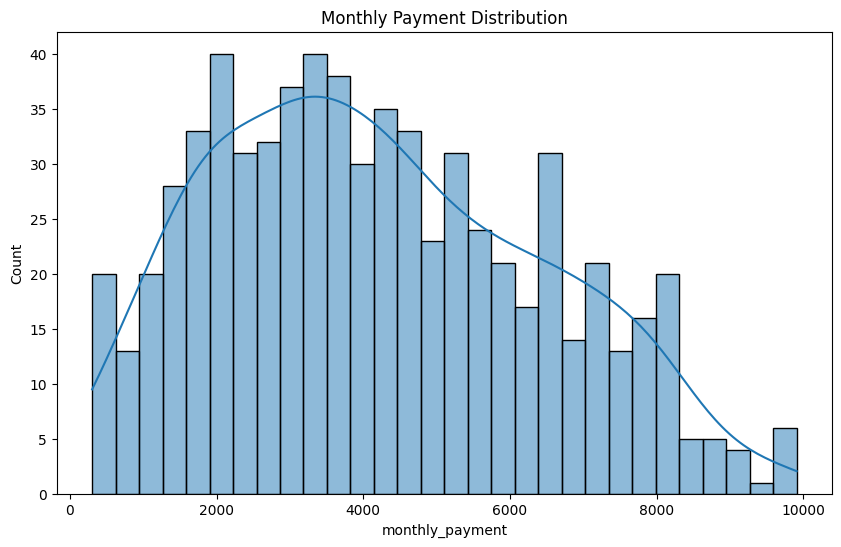

In [17]:
# investigating the distribution of monthly_payment to make groups
plt.figure(figsize= (10,6))
sns.histplot(df_c["monthly_payment"],bins= 30,kde= True)
plt.title("Monthly Payment Distribution")
plt.show()

In [18]:
min_pay = df_c["monthly_payment"].min()
max_pay = df_c["monthly_payment"].max()
df_c["monthly_payment"] = pd.cut(
    df_c["monthly_payment"],
    bins= [min_pay, 3000, 5000,max_pay],
    labels=["low_income","medium_income","high_income"]
)


In [19]:
df_c

,loan_id,account_id,loan_issued_date,loan_year,loan_amount,loan_duration,monthly_payment,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,sanction_count,risk_flag_sanctions,card_usage_count,tech_adoption_flag
0,5005,176,1997-04-10,1997,low_amount,short_term,low_income,1,Male,32,25-40,Novy Jicin,north Moravia,5.750,8678,29.69,49256.09,positive_acc_bal,6985.3,0,1,0,1
1,6015,5001,1996-11-09,1996,mid_amount,short_term,medium_income,1,Male,36,25-40,Blansko,south Moravia,3.045,8240,17.39,54492.88,positive_acc_bal,13880.5,0,1,0,1
2,5319,1811,1994-06-23,1994,high_amount,long_term,medium_income,1,Female,57,Over 55,Teplice,north Bohemia,6.780,9317,53.94,35110.61,positive_acc_bal,14941.8,0,1,0,1
3,5815,4116,1998-06-03,1998,mid_amount,long_term,medium_income,1,Male,53,41-55,Kutna Hora,central Bohemia,3.485,8546,36.94,52607.39,positive_acc_bal,18648.2,0,1,0,1
4,5002,173,1994-05-31,1994,mid_amount,short_term,high_income,1,Male,60,Over 55,Zdar nad Sazavou,south Moravia,3.815,8512,17.28,37433.85,positive_acc_bal,17342.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6249,6138,1997-07-30,1997,low_amount,short_term,low_income,1,Female,36,25-40,Brno - mesto,south Moravia,1.780,9897,48.27,23762.46,positive_acc_bal,13686.3,0,1,0,1
678,6755,8713,1998-07-24,1998,mid_amount,long_term,low_income,1,Male,28,25-40,Blansko,south Moravia,3.045,8240,17.39,32501.45,positive_acc_bal,2845.0,0,1,0,1
679,6215,5944,1998-06-18,1998,low_amount,long_term,low_income,1,Female,55,41-55,Plzen - jih,west Bohemia,0.970,8561,16.02,47499.13,positive_acc_bal,6325.0,0,1,1,0
680,5693,3489,1995-08-01,1995,low_amount,short_term,low_income,1,Female,48,41-55,Nymburk,central Bohemia,3.680,8899,33.65,43216.35,positive_acc_bal,5210.0,0,1,0,1


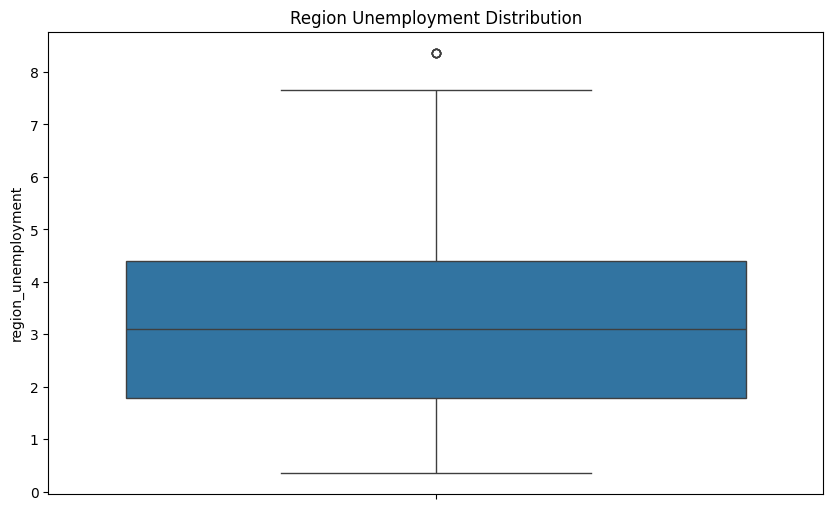

In [20]:
# investigating the distribution of region_unemployment to make groups
plt.figure(figsize=(10,6))
sns.boxplot(df["region_unemployment"])
plt.title("Region Unemployment Distribution")
plt.show()

In [21]:
df_c["region_unemployment"] = pd.qcut(
    df_c["region_unemployment"],
    q = 3,
    labels=["Low_Rate","Medium_Rate","High_Rate"]
)

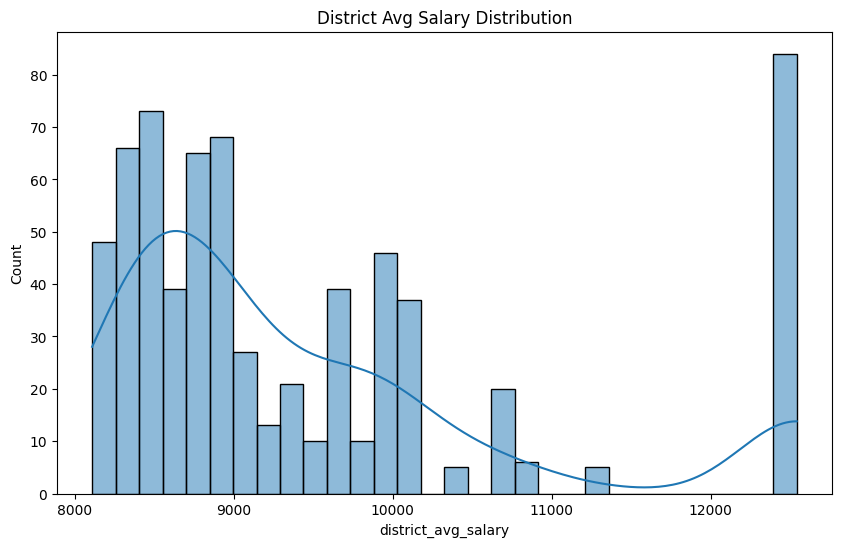

In [22]:
# investigating the distribution of district_avg_salary  to make groups 
plt.figure(figsize=(10,6))
sns.histplot(df["district_avg_salary"],bins = 30,kde= True)
plt.title("District Avg Salary Distribution")
plt.show()

In [23]:
import math
min_avg_sal = df_c["district_avg_salary"].min()
max_avg_sal = df_c["district_avg_salary"].max()
df_c["district_avg_salary"] = pd.cut(
    df_c["district_avg_salary"],
    bins = [min_avg_sal, 8600,9500,math.inf],
    labels= ["Low_Avg_Income","Medium_Avg_Income","High_Avg_Income"]
    
)

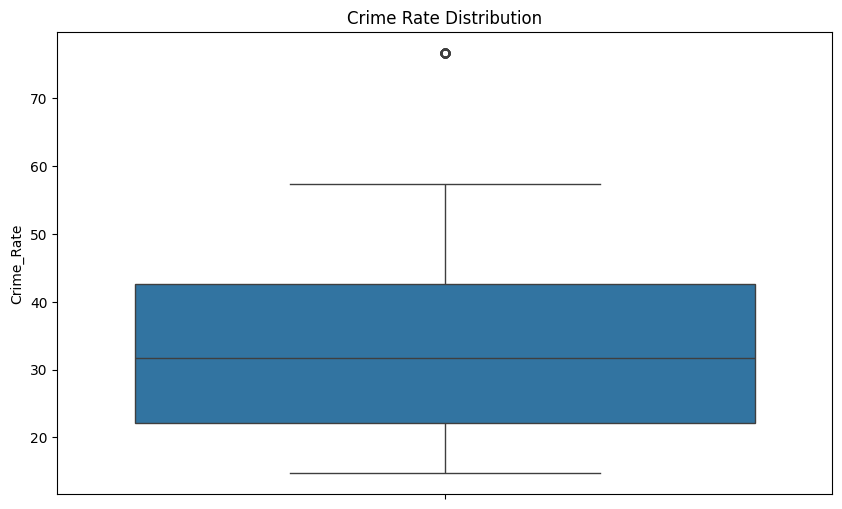

In [24]:
# investigating the distribution of Crime_Rate to make groups
plt.figure(figsize = (10,6))
sns.boxplot(df_c["Crime_Rate"])
plt.title("Crime Rate Distribution")
plt.show()

In [25]:
df_c["Crime_Rate"]  = pd.qcut(
    df_c["Crime_Rate"],
    q = 3,
    labels= ["Low_Crime_Rate","Medium_Crime_Rate","High_Crime_Rate"]
)

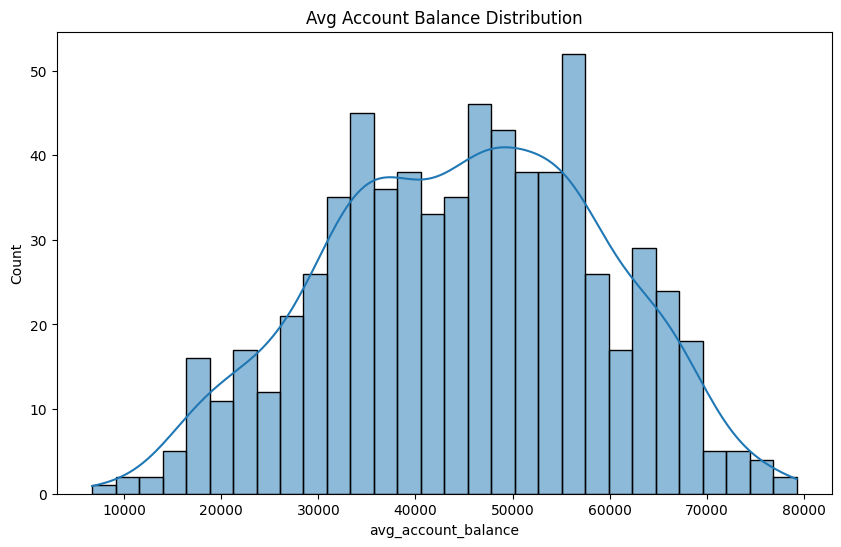

In [26]:
# investigating the distribution of avg_account_balance to make groups 
plt.figure(figsize = (10,6))
sns.histplot(df_c["avg_account_balance"],bins = 30,kde = True)
plt.title("Avg Account Balance Distribution")
plt.show()

In [27]:
df_c["avg_account_balance"] = pd.qcut(
     df_c["avg_account_balance"],
     q =3,
     labels= ["Low_Balance","Medium_Balance","High_Balance"]
)

In [28]:
df_c

,loan_id,account_id,loan_issued_date,loan_year,loan_amount,loan_duration,monthly_payment,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,sanction_count,risk_flag_sanctions,card_usage_count,tech_adoption_flag
0,5005,176,1997-04-10,1997,low_amount,short_term,low_income,1,Male,32,25-40,Novy Jicin,north Moravia,High_Rate,Medium_Avg_Income,Medium_Crime_Rate,Medium_Balance,positive_acc_bal,6985.3,0,1,0,1
1,6015,5001,1996-11-09,1996,mid_amount,short_term,medium_income,1,Male,36,25-40,Blansko,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,High_Balance,positive_acc_bal,13880.5,0,1,0,1
2,5319,1811,1994-06-23,1994,high_amount,long_term,medium_income,1,Female,57,Over 55,Teplice,north Bohemia,High_Rate,Medium_Avg_Income,High_Crime_Rate,Low_Balance,positive_acc_bal,14941.8,0,1,0,1
3,5815,4116,1998-06-03,1998,mid_amount,long_term,medium_income,1,Male,53,41-55,Kutna Hora,central Bohemia,Medium_Rate,Low_Avg_Income,Medium_Crime_Rate,High_Balance,positive_acc_bal,18648.2,0,1,0,1
4,5002,173,1994-05-31,1994,mid_amount,short_term,high_income,1,Male,60,Over 55,Zdar nad Sazavou,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,Low_Balance,positive_acc_bal,17342.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6249,6138,1997-07-30,1997,low_amount,short_term,low_income,1,Female,36,25-40,Brno - mesto,south Moravia,Low_Rate,High_Avg_Income,High_Crime_Rate,Low_Balance,positive_acc_bal,13686.3,0,1,0,1
678,6755,8713,1998-07-24,1998,mid_amount,long_term,low_income,1,Male,28,25-40,Blansko,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,Low_Balance,positive_acc_bal,2845.0,0,1,0,1
679,6215,5944,1998-06-18,1998,low_amount,long_term,low_income,1,Female,55,41-55,Plzen - jih,west Bohemia,Low_Rate,Low_Avg_Income,Low_Crime_Rate,Medium_Balance,positive_acc_bal,6325.0,0,1,1,0
680,5693,3489,1995-08-01,1995,low_amount,short_term,low_income,1,Female,48,41-55,Nymburk,central Bohemia,Medium_Rate,Medium_Avg_Income,Medium_Crime_Rate,Medium_Balance,positive_acc_bal,5210.0,0,1,0,1


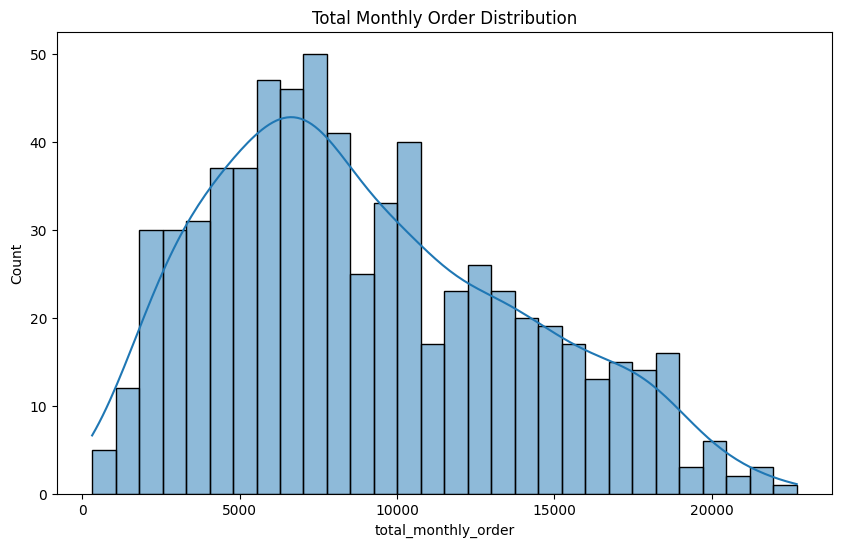

In [29]:
# investigating the distribution of total_monthly_order to make groups 
plt.figure(figsize = (10,6))
sns.histplot(df_c["total_monthly_order"],bins = 30,kde = True)
plt.title("Total Monthly Order Distribution")
plt.show()

In [30]:
df_c["total_monthly_order"] = pd.qcut(
    df_c["total_monthly_order"],
    q = 3,
    labels = ["Low_Expenses", "Medium_Expenses","High_Expenses"]
)

In [31]:
df_c["card_usage_count"].unique()

array([ 0,  3,  5, 22,  1,  8, 13,  6,  4, 11, 25, 12,  9,  2, 15, 14, 24,
       19, 34, 10, 30, 16,  7, 20, 23, 18, 27])

In [32]:
def categorize_card_usage(count):
    if count == 0:
        return 'No Usage'
    elif count <= 5:
        return 'Low Usage'
    else:
        return 'High Usage'

df_c['card_usage_cat'] = df_c['card_usage_count'].apply(categorize_card_usage)

In [33]:
df_c

,loan_id,account_id,loan_issued_date,loan_year,loan_amount,loan_duration,monthly_payment,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,sanction_count,risk_flag_sanctions,card_usage_count,tech_adoption_flag,card_usage_cat
0,5005,176,1997-04-10,1997,low_amount,short_term,low_income,1,Male,32,25-40,Novy Jicin,north Moravia,High_Rate,Medium_Avg_Income,Medium_Crime_Rate,Medium_Balance,positive_acc_bal,Medium_Expenses,0,1,0,1,No Usage
1,6015,5001,1996-11-09,1996,mid_amount,short_term,medium_income,1,Male,36,25-40,Blansko,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,High_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage
2,5319,1811,1994-06-23,1994,high_amount,long_term,medium_income,1,Female,57,Over 55,Teplice,north Bohemia,High_Rate,Medium_Avg_Income,High_Crime_Rate,Low_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage
3,5815,4116,1998-06-03,1998,mid_amount,long_term,medium_income,1,Male,53,41-55,Kutna Hora,central Bohemia,Medium_Rate,Low_Avg_Income,Medium_Crime_Rate,High_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage
4,5002,173,1994-05-31,1994,mid_amount,short_term,high_income,1,Male,60,Over 55,Zdar nad Sazavou,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,Low_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6249,6138,1997-07-30,1997,low_amount,short_term,low_income,1,Female,36,25-40,Brno - mesto,south Moravia,Low_Rate,High_Avg_Income,High_Crime_Rate,Low_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage
678,6755,8713,1998-07-24,1998,mid_amount,long_term,low_income,1,Male,28,25-40,Blansko,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,Low_Balance,positive_acc_bal,Low_Expenses,0,1,0,1,No Usage
679,6215,5944,1998-06-18,1998,low_amount,long_term,low_income,1,Female,55,41-55,Plzen - jih,west Bohemia,Low_Rate,Low_Avg_Income,Low_Crime_Rate,Medium_Balance,positive_acc_bal,Medium_Expenses,0,1,1,0,Low Usage
680,5693,3489,1995-08-01,1995,low_amount,short_term,low_income,1,Female,48,41-55,Nymburk,central Bohemia,Medium_Rate,Medium_Avg_Income,Medium_Crime_Rate,Medium_Balance,positive_acc_bal,Low_Expenses,0,1,0,1,No Usage


In [34]:
df_c["sanction_count"].unique()

def categorize_sanctions(count):
    if count == 0:
        return 'No Sanctions'
    elif count <= 5:
        return 'Some Sanctions'
    else:
        return 'Critical Sanctions' 

df_c['sanction_category'] = df_c['sanction_count'].apply(categorize_sanctions)



In [35]:
df_c

,loan_id,account_id,loan_issued_date,loan_year,loan_amount,loan_duration,monthly_payment,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,sanction_count,risk_flag_sanctions,card_usage_count,tech_adoption_flag,card_usage_cat,sanction_category
0,5005,176,1997-04-10,1997,low_amount,short_term,low_income,1,Male,32,25-40,Novy Jicin,north Moravia,High_Rate,Medium_Avg_Income,Medium_Crime_Rate,Medium_Balance,positive_acc_bal,Medium_Expenses,0,1,0,1,No Usage,No Sanctions
1,6015,5001,1996-11-09,1996,mid_amount,short_term,medium_income,1,Male,36,25-40,Blansko,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,High_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage,No Sanctions
2,5319,1811,1994-06-23,1994,high_amount,long_term,medium_income,1,Female,57,Over 55,Teplice,north Bohemia,High_Rate,Medium_Avg_Income,High_Crime_Rate,Low_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage,No Sanctions
3,5815,4116,1998-06-03,1998,mid_amount,long_term,medium_income,1,Male,53,41-55,Kutna Hora,central Bohemia,Medium_Rate,Low_Avg_Income,Medium_Crime_Rate,High_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage,No Sanctions
4,5002,173,1994-05-31,1994,mid_amount,short_term,high_income,1,Male,60,Over 55,Zdar nad Sazavou,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,Low_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage,No Sanctions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6249,6138,1997-07-30,1997,low_amount,short_term,low_income,1,Female,36,25-40,Brno - mesto,south Moravia,Low_Rate,High_Avg_Income,High_Crime_Rate,Low_Balance,positive_acc_bal,High_Expenses,0,1,0,1,No Usage,No Sanctions
678,6755,8713,1998-07-24,1998,mid_amount,long_term,low_income,1,Male,28,25-40,Blansko,south Moravia,Medium_Rate,Low_Avg_Income,Low_Crime_Rate,Low_Balance,positive_acc_bal,Low_Expenses,0,1,0,1,No Usage,No Sanctions
679,6215,5944,1998-06-18,1998,low_amount,long_term,low_income,1,Female,55,41-55,Plzen - jih,west Bohemia,Low_Rate,Low_Avg_Income,Low_Crime_Rate,Medium_Balance,positive_acc_bal,Medium_Expenses,0,1,1,0,Low Usage,No Sanctions
680,5693,3489,1995-08-01,1995,low_amount,short_term,low_income,1,Female,48,41-55,Nymburk,central Bohemia,Medium_Rate,Medium_Avg_Income,Medium_Crime_Rate,Medium_Balance,positive_acc_bal,Low_Expenses,0,1,0,1,No Usage,No Sanctions


In [36]:
df_ml = df_c.copy()

In [37]:
df_ml = df_ml.drop(["loan_id","account_id","loan_issued_date","sanction_count","card_usage_count"],axis = 1)

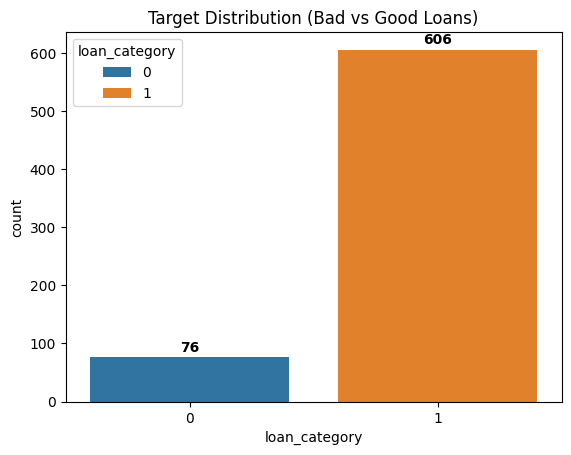

In [38]:
# Target Distribution
ax = sns.countplot(data=df_ml, x="loan_category", hue="loan_category")

plt.title("Target Distribution (Bad vs Good Loans)")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=2, fontsize=10, fontweight="bold")


    

In [39]:
df_ml[df_ml["district_avg_salary"].isna()]

,loan_year,loan_amount,loan_duration,monthly_payment,loan_category,gender,age,age_group,district_name,region,region_unemployment,district_avg_salary,Crime_Rate,avg_account_balance,min_account_balance,total_monthly_order,risk_flag_sanctions,tech_adoption_flag,card_usage_cat,sanction_category
133,1997,high_amount,long_term,high_income,0,Female,42,41-55,Bruntal,north Moravia,High_Rate,NaN,Medium_Crime_Rate,Medium_Balance,negative_acc_bal,Low_Expenses,0,1,No Usage,Some Sanctions
138,1996,mid_amount,short_term,high_income,1,Female,37,25-40,Bruntal,north Moravia,High_Rate,NaN,Medium_Crime_Rate,Low_Balance,positive_acc_bal,High_Expenses,1,1,No Usage,No Sanctions
276,1994,high_amount,long_term,high_income,0,Female,33,25-40,Bruntal,north Moravia,High_Rate,NaN,Medium_Crime_Rate,Low_Balance,negative_acc_bal,High_Expenses,0,1,No Usage,Critical Sanctions
352,1998,high_amount,long_term,high_income,0,Female,21,Under 25,Bruntal,north Moravia,High_Rate,NaN,Medium_Crime_Rate,Low_Balance,negative_acc_bal,Medium_Expenses,0,1,No Usage,Critical Sanctions
480,1994,low_amount,short_term,medium_income,1,Female,22,Under 25,Bruntal,north Moravia,High_Rate,NaN,Medium_Crime_Rate,Low_Balance,positive_acc_bal,Low_Expenses,0,1,No Usage,Critical Sanctions
671,1997,high_amount,long_term,high_income,1,Male,37,25-40,Bruntal,north Moravia,High_Rate,NaN,Medium_Crime_Rate,High_Balance,positive_acc_bal,High_Expenses,1,1,No Usage,No Sanctions


In [40]:
from sklearn.model_selection import train_test_split
df_ml = df_ml.dropna()
TARGET = df_ml["loan_category"]
X = df_ml.drop(["loan_category"],axis = 1)
y = TARGET

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42,test_size= 0.4)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 230 to 102
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_year            405 non-null    int64   
 1   loan_amount          405 non-null    category
 2   loan_duration        405 non-null    object  
 3   monthly_payment      405 non-null    category
 4   gender               405 non-null    object  
 5   age                  405 non-null    int64   
 6   age_group            405 non-null    object  
 7   district_name        405 non-null    object  
 8   region               405 non-null    object  
 9   region_unemployment  405 non-null    category
 10  district_avg_salary  405 non-null    category
 11  Crime_Rate           405 non-null    category
 12  avg_account_balance  405 non-null    category
 13  min_account_balance  405 non-null    object  
 14  total_monthly_order  405 non-null    category
 15  risk_flag_sanctions  405 n

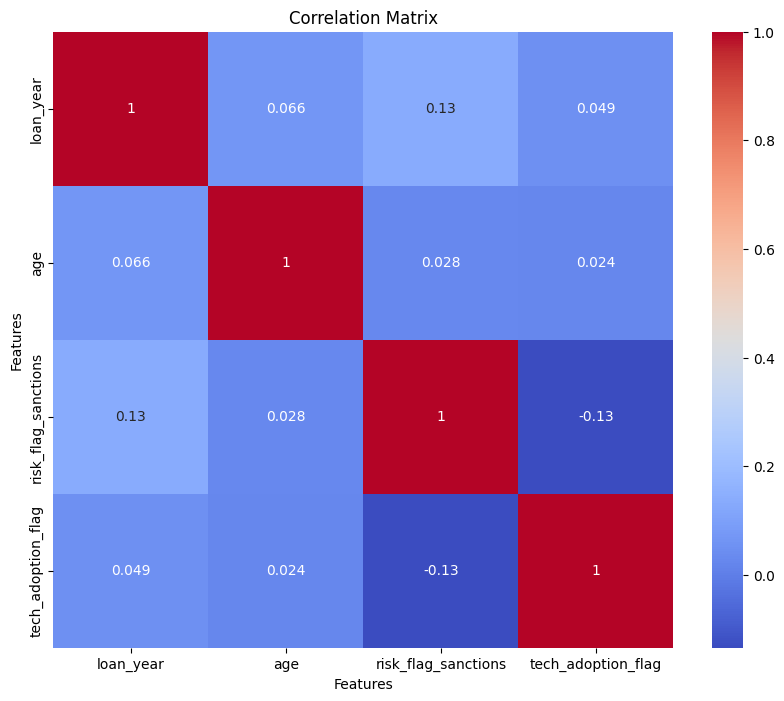

In [42]:
# featue selection
num_f = X_train.select_dtypes(include= "int64").columns.to_list()

corr_matrx = X_train[num_f].corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrx,annot = True,cmap= "coolwarm")
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [43]:
from sklearn.feature_selection import f_classif,mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
a = 0.05
X_train_num = X_train[num_f]
f_scores,p_values = f_classif(X_train_num,y_train)
p_val = pd.Series(p_values,index = num_f)
selected_features = p_val[p_val < a].index

X_train_p_num = X_train[selected_features]
X_test_p_num= X_test[selected_features]

print(f"Original numeric features: {len(num_f)}")
print(f"Selected significant features: {len(selected_features)}")
print("Selected columns:", selected_features.tolist())


Original numeric features: 4
Selected significant features: 3
Selected columns: ['loan_year', 'risk_flag_sanctions', 'tech_adoption_flag']


In [44]:
cat_f  = X_train.select_dtypes(include= ["object","category"]).columns.to_list()

In [45]:
cat_f

['loan_amount',
 'loan_duration',
 'monthly_payment',
 'gender',
 'age_group',
 'district_name',
 'region',
 'region_unemployment',
 'district_avg_salary',
 'Crime_Rate',
 'avg_account_balance',
 'min_account_balance',
 'total_monthly_order',
 'card_usage_cat',
 'sanction_category']


 Mutual Information Scores:
min_account_balance    3.926745e-01
sanction_category      2.978073e-01
district_name          9.302016e-02
avg_account_balance    4.019175e-02
card_usage_cat         1.366746e-02
region                 1.106187e-02
loan_amount            8.365746e-03
total_monthly_order    7.740971e-03
monthly_payment        5.840931e-03
age_group              2.676591e-03
region_unemployment    1.945041e-03
district_avg_salary    1.680053e-03
Crime_Rate             2.720525e-04
loan_duration          8.565977e-05
gender                 4.689733e-07
dtype: float64


C:\Users\vagel\AppData\Local\Temp\ipykernel_8336\789901226.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores.values, y=mi_scores.index, palette='viridis')


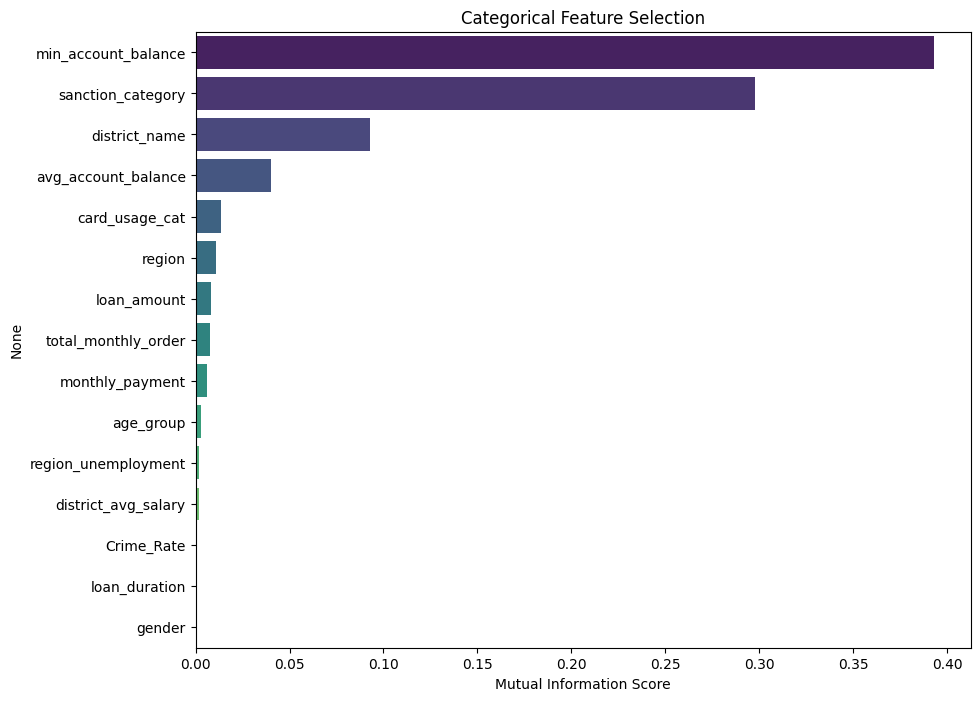

✅ Selected 6 Important Features:
['min_account_balance', 'sanction_category', 'district_name', 'avg_account_balance', 'card_usage_cat', 'region']


In [46]:
encoder = OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train[cat_f])
mi_scores = mutual_info_classif(X_train_cat_encoded, y_train, discrete_features=True, random_state=42)


mi_scores = pd.Series(mi_scores, index= cat_f)
mi_scores = mi_scores.sort_values(ascending=False)

print("\n Mutual Information Scores:")
print(mi_scores)


plt.figure(figsize=(10, 8))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette='viridis')
plt.title("Categorical Feature Selection")
plt.xlabel("Mutual Information Score")
plt.show()


selected_features = mi_scores[mi_scores > 0.01].index.tolist()

print(f"✅ Selected {len(selected_features)} Important Features:")
print(selected_features)

X_train_cat =X_train[selected_features + ["loan_duration","total_monthly_order"]]
X_test_cat = X_test[selected_features + ["loan_duration","total_monthly_order"]]



In [47]:
X_train_final = pd.concat([X_train_p_num,X_train_cat],axis= 1)
X_test_final = pd.concat([X_test_p_num,X_test_cat],axis = 1)

In [48]:
print(f"Final Train Shape: {X_train_final.shape}")

print(f"Final Test Shape:  {X_test_final.shape}")

X_train_final.head()

Final Train Shape: (405, 11)
Final Test Shape:  (270, 11)


,loan_year,risk_flag_sanctions,tech_adoption_flag,min_account_balance,sanction_category,district_name,avg_account_balance,card_usage_cat,region,loan_duration,total_monthly_order
230,1998,1,0,positive_acc_bal,No Sanctions,Hl.m. Praha,High_Balance,Low Usage,Prague,short_term,High_Expenses
605,1996,0,1,negative_acc_bal,Some Sanctions,Rakovnik,Medium_Balance,No Usage,central Bohemia,short_term,Medium_Expenses
655,1997,1,1,positive_acc_bal,No Sanctions,Havlickuv Brod,Medium_Balance,No Usage,east Bohemia,long_term,Low_Expenses
421,1998,1,1,positive_acc_bal,No Sanctions,Vyskov,High_Balance,No Usage,south Moravia,long_term,Low_Expenses
146,1997,0,1,negative_acc_bal,Critical Sanctions,Ostrava - mesto,Low_Balance,No Usage,north Moravia,short_term,Medium_Expenses


In [49]:
num_f_f = X_train_final.select_dtypes(include= ["int64"]).columns.to_list()
cat_f_f = X_train_final.select_dtypes(include= ["object","category"]).columns.to_list()

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SkPipeline

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [51]:
num_pipe = SkPipeline([
    ("imputer",SimpleImputer(strategy= "median")),
    ("scaler",StandardScaler())
])


cat_pipe = SkPipeline([
    ("imputer",SimpleImputer(strategy= "most_frequent")),
    ("encoder",OneHotEncoder(handle_unknown= "ignore",sparse_output= False))
])



In [52]:
dropped_cols = ['risk_flag_sanctions', 'sanction_category', 'min_account_balance', 
                'loan_year', 'avg_account_balance']


final_num_f = [c for c in num_f_f if c not in dropped_cols]
final_cat_f = [c for c in cat_f_f if c not in dropped_cols]

preprocessor = ColumnTransformer([
    ("num", num_pipe, final_num_f),
    ("cat", cat_pipe, final_cat_f)\
])

pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / max(pos, 1)

models = {
"LogisticRegression": LogisticRegression(
        random_state=42,
        max_iter=1000,          
        class_weight='balanced' 
    ),
    
    
"RandomForestClassifier": RandomForestClassifier(
        n_estimators=300,      
        max_depth=None,        
        min_samples_split=5,   
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced' 
    ),
  
"XGBClassifier": XGBClassifier(
        n_estimators=500,     
        learning_rate=0.05,   
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        tree_method="hist",
        objective='binary:logistic', 
        eval_metric='logloss',
        scale_pos_weight = scale_pos_weight       
       
    ),
   
"MLPClassifier": MLPClassifier(
        hidden_layer_sizes=(64, 32),  
        activation='relu',
        solver='adam',
        learning_rate='adaptive',
        max_iter=300,                  
        random_state=42
       
    )
}

In [53]:
X_final_clean = X_train.drop(columns= dropped_cols, errors='ignore')
X_test_final_clean = X_test.drop(columns= dropped_cols, errors='ignore')

In [54]:

results = []

scoring = {
    "accuracy": "accuracy",
    "f1": "f1",            
    "precision": "precision",
    "recall": "recall",
    "roc_auc": "roc_auc"  
}

print("Starting comparison for ALL models...")


for name, model in models.items():
    
   
    if name == "MLPClassifier":
        ml_pipe = ImbPipeline([
             ("preprocessor", preprocessor), 
             ("smote", SMOTE(random_state=42)),
             ("classifier", model)
         ])
    else:
   
        ml_pipe = ImbPipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
    
    
    cv_res = cross_validate(
        ml_pipe,               
        X_final_clean,       
        y_train,
        cv=5,               
        scoring=scoring,
        n_jobs=-1,         
        return_train_score=False
    )
    
   
    results.append({
        "model": name,
        "accuracy_mean":  cv_res["test_accuracy"].mean(),
        "f1_mean":        cv_res["test_f1"].mean(),    
        "roc_auc_mean":   cv_res["test_roc_auc"].mean(),
        "precision_mean": cv_res["test_precision"].mean(),
        "recall_mean":    cv_res["test_recall"].mean(),
        "f1_std":         cv_res["test_f1"].std()       
    })
    
   


cv_summary = pd.DataFrame(results)
cv_summary = cv_summary.sort_values(by="f1_mean", ascending=False)

print("\nCross-Validation Results (Sorted by F1_mean Score):")
print(cv_summary)
        

Starting comparison for ALL models...

Cross-Validation Results (Sorted by F1_mean Score):
                    model  accuracy_mean   f1_mean  roc_auc_mean  \
3           MLPClassifier       0.765432  0.863176      0.486964   
1  RandomForestClassifier       0.716049  0.826305      0.538967   
2           XGBClassifier       0.641975  0.761727      0.550101   
0      LogisticRegression       0.619753  0.751568      0.558469   

   precision_mean  recall_mean    f1_std  
3        0.872503     0.854728  0.009586  
1        0.872988     0.786197  0.040038  
2        0.886643     0.672233  0.057749  
0        0.864893     0.666479  0.032210  


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

leakage_cols = ['risk_flag_sanctions', 'sanction_category', 'min_account_balance']


new_num_f = [c for c in num_f_f if c not in leakage_cols]
new_cat_f = [c for c in cat_f_f if c not in leakage_cols]

X_clean = X_train.drop(columns=leakage_cols, errors='ignore')
preprocessor_clean = ColumnTransformer([
    ("num", num_pipe, new_num_f),
    ("cat", cat_pipe, new_cat_f)
])


print(f"Testing for Data Leakage without columns: {leakage_cols}")

rf_test = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


scores = cross_val_score(rf_test, preprocessor_clean.fit_transform(X_clean), y_train, cv=5, scoring='f1')

print("\n" + "="*40)
print(f"New Realistic F1 Score: {scores.mean():.2%}")
print("="*40)

Testing for Data Leakage without columns: ['risk_flag_sanctions', 'sanction_category', 'min_account_balance']

New Realistic F1 Score: 91.65%


C:\Users\vagel\AppData\Local\Temp\ipykernel_8336\1895787671.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')


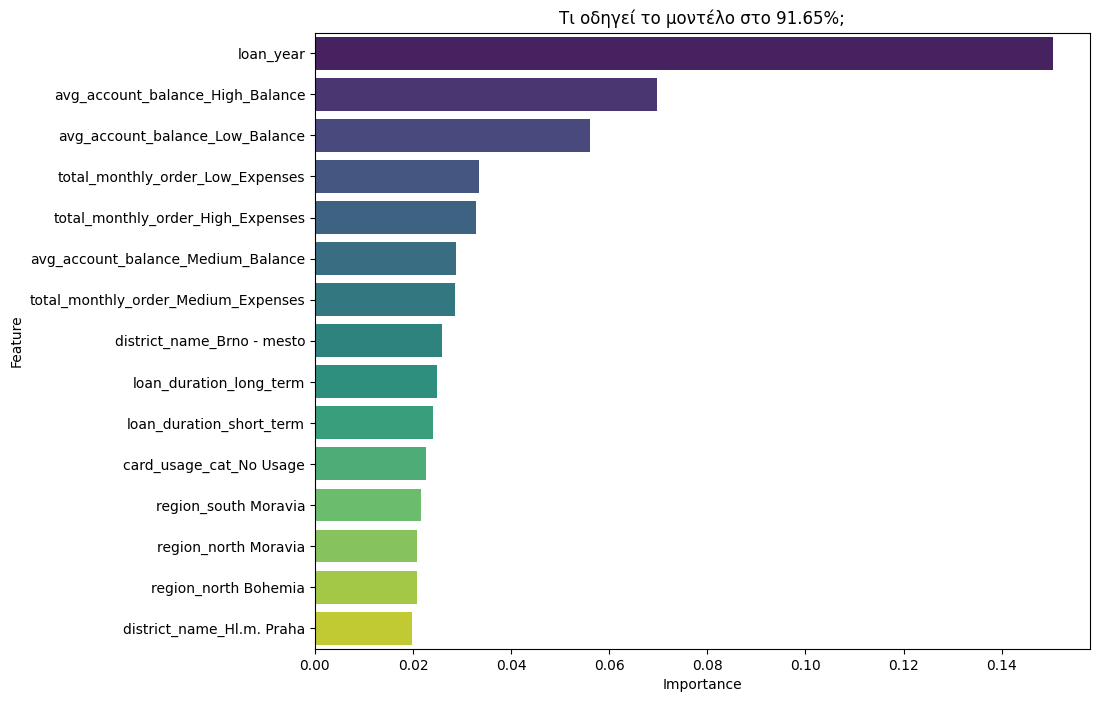

                              Feature  Importance
0                           loan_year    0.150469
76   avg_account_balance_High_Balance    0.069716
77    avg_account_balance_Low_Balance    0.055982
93   total_monthly_order_Low_Expenses    0.033439
92  total_monthly_order_High_Expenses    0.032924


In [56]:


rf_test.fit(preprocessor_clean.fit_transform(X_clean), y_train)


feature_names = []


feature_names.extend(new_num_f)


cat_encoder = preprocessor_clean.named_transformers_['cat']['encoder']
cat_features_encoded = cat_encoder.get_feature_names_out(new_cat_f)
feature_names.extend(cat_features_encoded)


importances = rf_test.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title('Τι οδηγεί το μοντέλο στο 91.65%;')
plt.show()

print(feat_imp.head(5))

In [57]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

# 1. Pipeline
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(random_state=42))
])


param_dist = {
    
    'classifier__n_estimators': [100, 200, 300],
    
    'classifier__max_depth': [10, 20, None],
    
    'classifier__criterion': ['gini', 'entropy'],
    
 
    'classifier__max_features': ['sqrt', 'log2'],
    
    'classifier__min_samples_split': randint(2, 11),  
    'classifier__min_samples_leaf': randint(1, 5),    
    
    'classifier__bootstrap': [True, False],
    
    
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

print(f"Running Randomized Search on {len(X_final_clean)} samples...")


random_search = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions=param_dist, 
    n_iter=100,   
    cv=5, 
    scoring='f1', 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

random_search.fit(X_final_clean, y_train)

print("\n" + "="*40)
print(f"BEST F1 SCORE: {random_search.best_score_:.2%}")
print("="*40)

print("Best Hyperparameters found:")
best_params = random_search.best_params_
for param, value in best_params.items():
    print(f"  • {param.replace('classifier__', '')}: {value}")

best_rf_model = random_search.best_estimator_

Running Randomized Search on 405 samples...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\vagel\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



BEST F1 SCORE: 87.64%
Best Hyperparameters found:
  • bootstrap: True
  • class_weight: balanced_subsample
  • criterion: gini
  • max_depth: 20
  • max_features: log2
  • min_samples_leaf: 1
  • min_samples_split: 3
  • n_estimators: 300



FINAL TEST SET PERFORMANCE
Accuracy: 85.19%
ROC AUC:  0.6068

Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.26      0.20        19
           1       0.94      0.90      0.92       251

    accuracy                           0.85       270
   macro avg       0.55      0.58      0.56       270
weighted avg       0.89      0.85      0.87       270



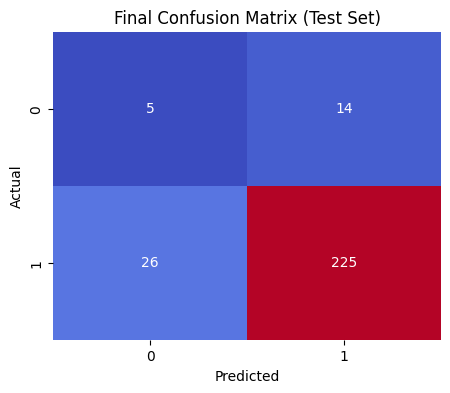

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

y_test_pred = best_rf_model.predict(X_test_final_clean)


print("\n" + "="*40)
print("FINAL TEST SET PERFORMANCE")
print("="*40)


acc = accuracy_score(y_test, y_test_pred)
roc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test_final_clean)[:, 1])

print(f"Accuracy: {acc:.2%}")
print(f"ROC AUC:  {roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Final Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
y_probs = best_rf_model.predict_proba(X_test_final_clean)

y_probs_class_0 = y_probs[:, 0] 

new_threshold = 0.4

y_pred_new = (y_probs_class_0 >= new_threshold).astype(int)


y_pred_adjusted = [0 if p >= new_threshold else 1 for p in y_probs_class_0]

print(f"New Results with Threshold {new_threshold}:")
print(classification_report(y_test, y_pred_adjusted))


cm = confusion_matrix(y_test, y_pred_adjusted)
print("New Confusion Matrix:\n", cm)

New Results with Threshold 0.4:
              precision    recall  f1-score   support

           0       0.10      0.37      0.16        19
           1       0.94      0.75      0.84       251

    accuracy                           0.73       270
   macro avg       0.52      0.56      0.50       270
weighted avg       0.88      0.73      0.79       270

New Confusion Matrix:
 [[  7  12]
 [ 62 189]]


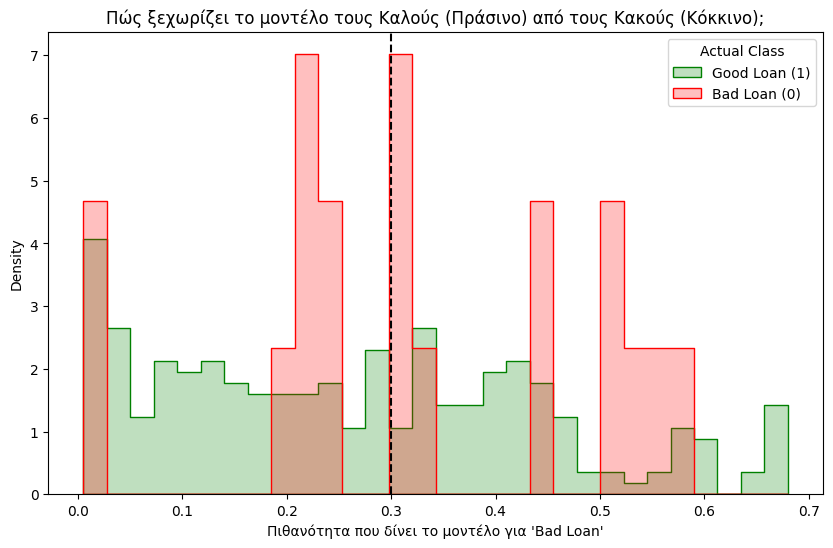

In [60]:
probs_class_0 = best_rf_model.predict_proba(X_test_final_clean)[:, 0]

plot_df = pd.DataFrame({
    'Probability_Bad_Loan': probs_class_0,
    'Actual_Label': y_test
})


plt.figure(figsize=(10, 6))
sns.histplot(
    data=plot_df, 
    x='Probability_Bad_Loan', 
    hue='Actual_Label', 
    element="step", 
    stat="density", 
    common_norm=False,
    palette={0: 'red', 1: 'green'}, 
    bins=30
)

plt.axvline(0.3, color='black', linestyle='--', label='Threshold 0.3')
plt.title("Πώς ξεχωρίζει το μοντέλο τους Καλούς (Πράσινο) από τους Κακούς (Κόκκινο);")
plt.xlabel("Πιθανότητα που δίνει το μοντέλο για 'Bad Loan'")
plt.legend(title='Actual Class', labels=['Good Loan (1)', 'Bad Loan (0)'])
plt.show()

In [61]:
best_rf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tech_adoption_flag']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['district_name',
                                                   'card_usage_cat', 'region',
                                                   'loan_duration',
                                                   'total_monthly_order'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=20, max_features='log2',
                                        min_samples_split=3, n_estimators=300,
                                        random_state=42))])

In [62]:
import joblib
model_data = {
    "model":best_rf_model,
    "threshold": 0.4,
    "feature_used": final_num_f + final_cat_f
}

joblib.dump(model_data, 'final_credit_risk_model.pkl')

print("Model saved successfully as 'final_credit_risk_model.pkl'")


Model saved successfully as 'final_credit_risk_model.pkl'


In [63]:
rf_model_shap = RandomForestClassifier(
    n_estimators=300,       
    max_depth=20,
    min_samples_split=3,
    max_features='log2',
    class_weight='balanced_subsample',
    random_state=42
)

In [64]:
import shap
X_clean = pd.DataFrame(X_clean)
preprocessor.fit(X_clean)

X_train_proc = preprocessor.transform(X_clean)
X_test_proc = preprocessor.transform(X_test_final_clean)

rand_f_shap = rf_model_shap.fit(X_train_proc,y_train)


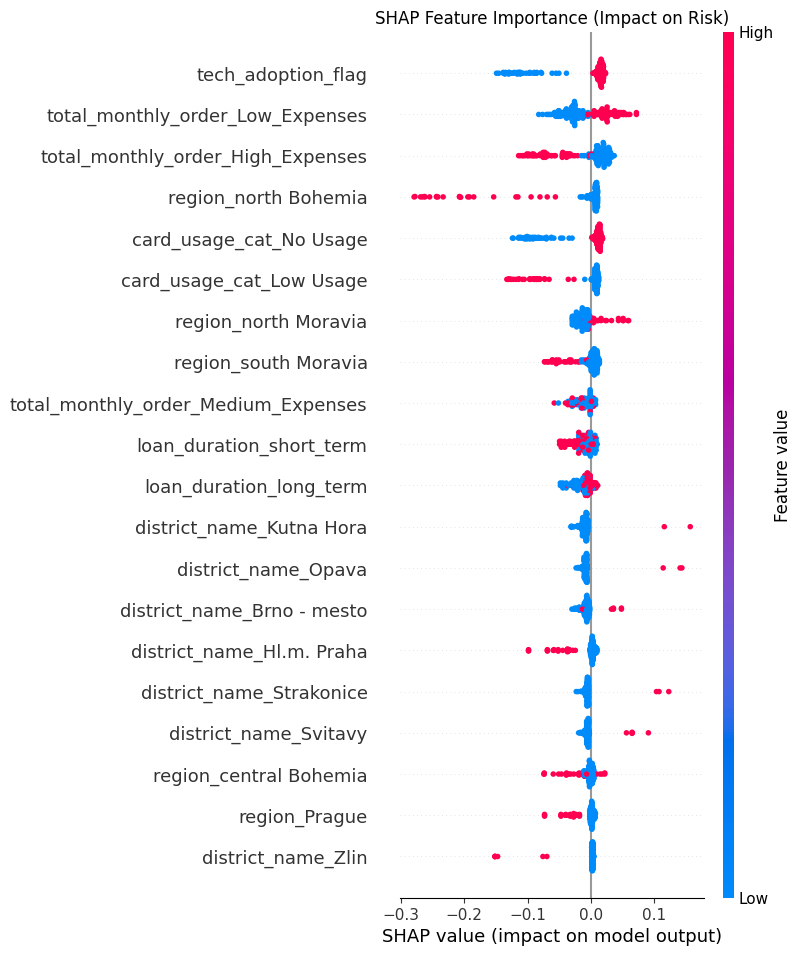

In [65]:
raw_feature_names = preprocessor.get_feature_names_out()
clean_feature_names = [f.split('__')[-1] for f in raw_feature_names]

idx = np.random.choice(X_test_proc.shape[0], size=200, replace=False)
X_sample = X_test_proc[idx]


X_sample_df = pd.DataFrame(X_sample, columns=clean_feature_names)


explainer = shap.TreeExplainer(rf_model_shap)
shap_explanation = explainer(X_sample_df)

shap_values_bad_loan = shap_explanation[:, :, 0]


plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_bad_loan, 
    X_sample_df, 
    show=False 
)


plt.title("SHAP Feature Importance (Impact on Risk)")
plt.savefig('shap_summary.png', bbox_inches='tight', dpi=300)
plt.show()

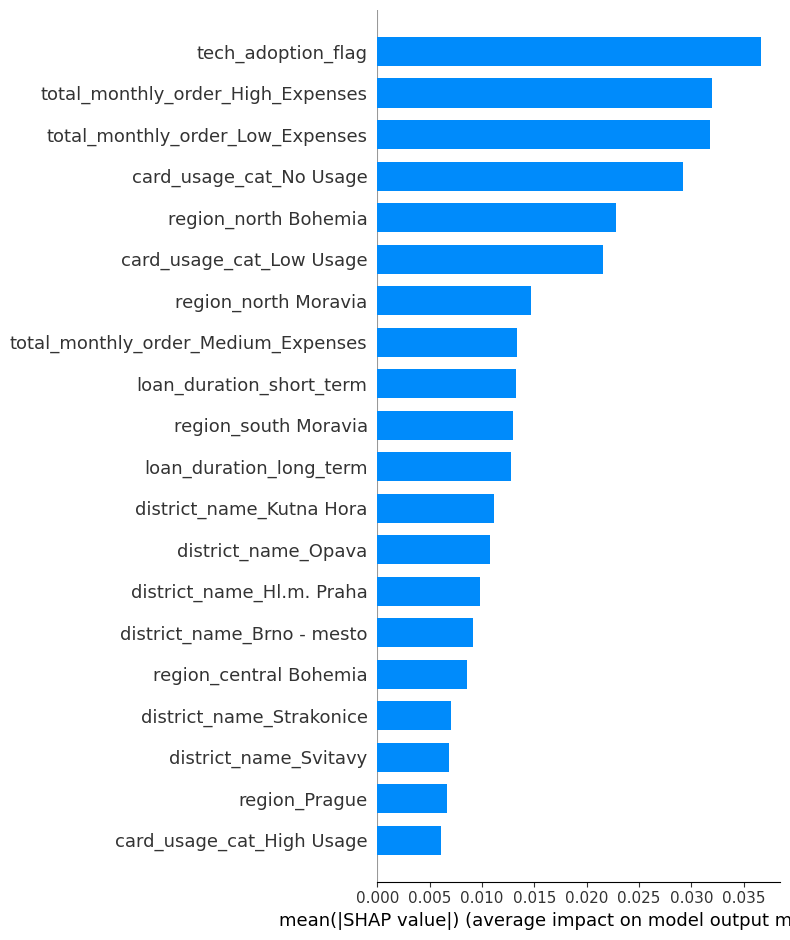

In [66]:
raw_feature_names = preprocessor.get_feature_names_out()
clean_feature_names = [f.split('__')[-1] for f in raw_feature_names]

idx = np.random.choice(X_test_proc.shape[0], size=200, replace=False)
X_sample = X_test_proc[idx]


X_sample_df = pd.DataFrame(X_sample, columns=clean_feature_names)


explainer = shap.TreeExplainer(rf_model_shap)
shap_explanation = explainer(X_sample_df)

shap_values_bad_loan = shap_explanation[:, :, 0]


plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_bad_loan, 
    X_sample_df, 
    plot_type = "bar"
)




In [67]:
clean_feature_names

['tech_adoption_flag',
 'district_name_Benesov',
 'district_name_Beroun',
 'district_name_Blansko',
 'district_name_Breclav',
 'district_name_Brno - mesto',
 'district_name_Brno - venkov',
 'district_name_Ceska Lipa',
 'district_name_Ceske Budejovice',
 'district_name_Cesky Krumlov',
 'district_name_Cheb',
 'district_name_Chomutov',
 'district_name_Chrudim',
 'district_name_Domazlice',
 'district_name_Frydek - Mistek',
 'district_name_Havlickuv Brod',
 'district_name_Hl.m. Praha',
 'district_name_Hodonin',
 'district_name_Hradec Kralove',
 'district_name_Jablonec n. Nisou',
 'district_name_Jesenik',
 'district_name_Jicin',
 'district_name_Jihlava',
 'district_name_Jindrichuv Hradec',
 'district_name_Karlovy Vary',
 'district_name_Karvina',
 'district_name_Klatovy',
 'district_name_Kolin',
 'district_name_Kromeriz',
 'district_name_Kutna Hora',
 'district_name_Liberec',
 'district_name_Litomerice',
 'district_name_Louny',
 'district_name_Melnik',
 'district_name_Mlada Boleslav',
 'distr

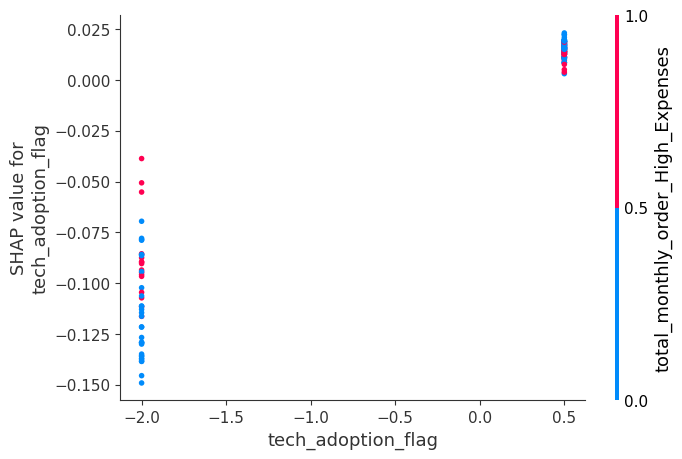

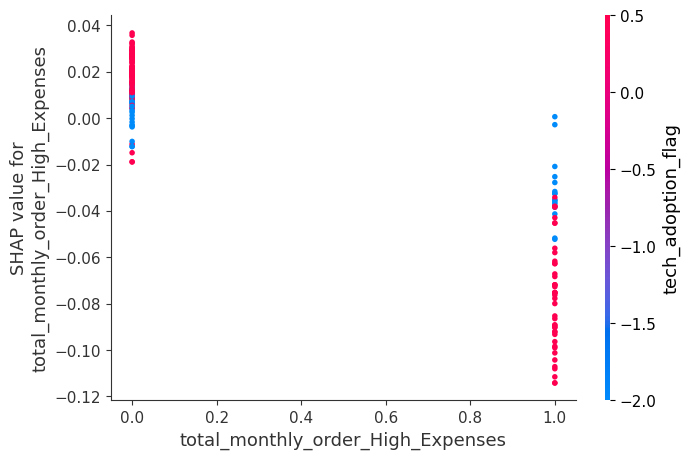

In [68]:
shap.dependence_plot("tech_adoption_flag",shap_values_bad_loan.values,X_sample_df,feature_names= clean_feature_names)
shap.dependence_plot("total_monthly_order_High_Expenses",shap_values_bad_loan.values, X_sample_df, feature_names=clean_feature_names)

Random indices [139 198]


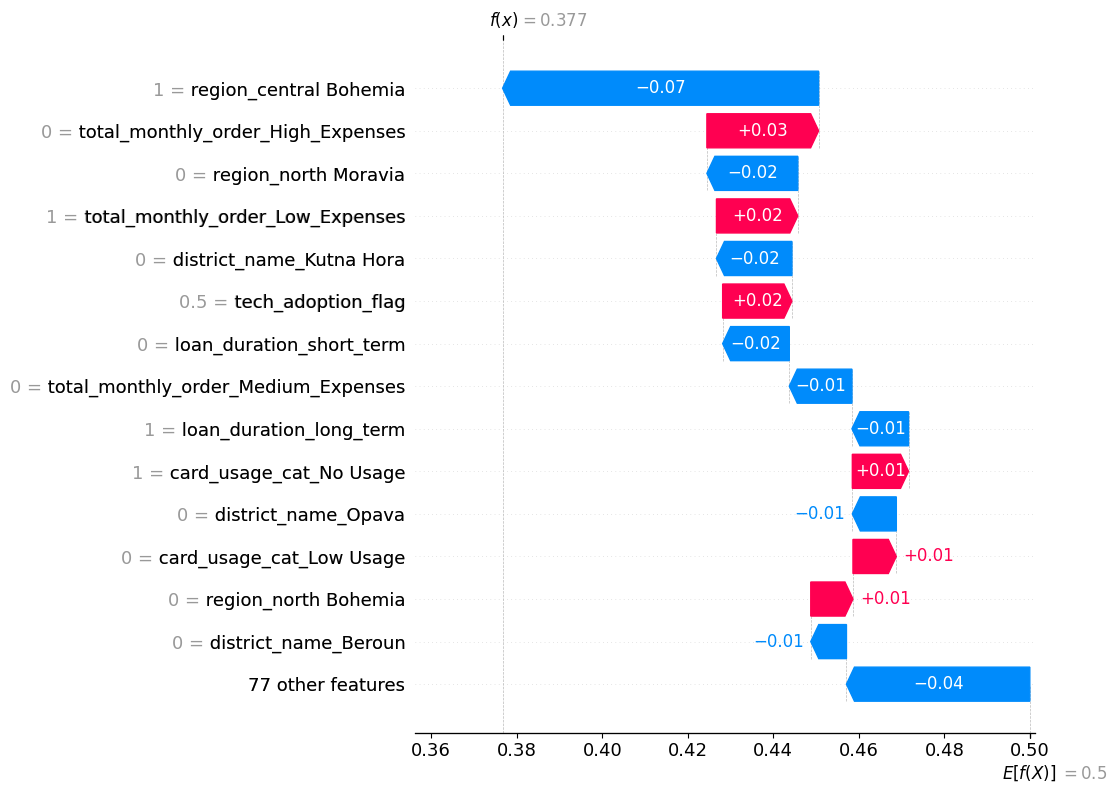

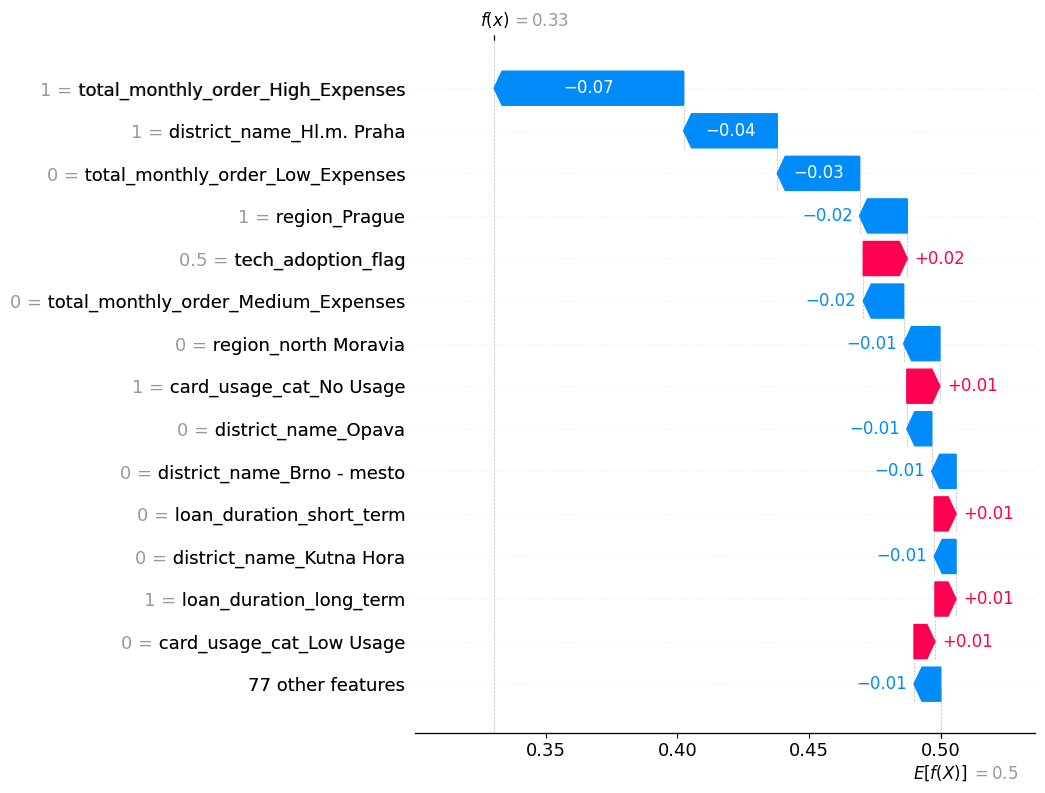

In [69]:
shap_values_bad_loan.feature_names = clean_feature_names
indices = np.random.choice(X_sample_df.shape[0],size = 2,replace= False)
print("Random indices", indices)

for person in indices:
    shap.plots.waterfall(shap_values_bad_loan[person],max_display= 15)